In [1]:
import os
os.chdir("C:\\Users\\vgonsalv\\Desktop\\DataScience\\Other projects\\Customer segmentation")
os.getcwd()

'C:\\Users\\vgonsalv\\Desktop\\DataScience\\Other projects\\Customer segmentation'

In [4]:
import numpy as np, pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
customers = pd.read_csv('Mall_Customers.csv')
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [36]:
customers.shape
customers.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

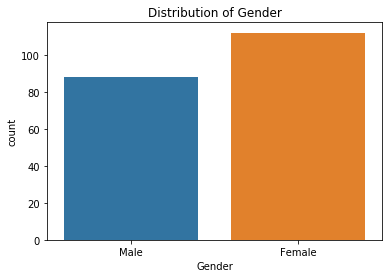

In [6]:
# See the distribution of gender to recognize different distributions
sns.countplot(x='Gender', data=customers);
plt.title('Distribution of Gender');

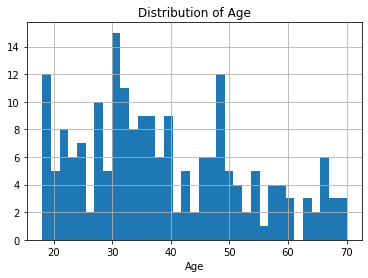

In [7]:
# Create a histogram of ages
customers.hist('Age', bins=35);
plt.title('Distribution of Age');
plt.xlabel('Age');

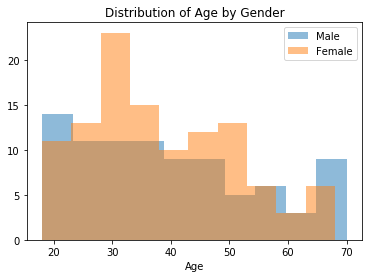

In [8]:
plt.hist('Age', data=customers[customers['Gender'] == 'Male'], alpha=0.5, label='Male');
plt.hist('Age', data=customers[customers['Gender'] == 'Female'], alpha=0.5, label='Female');
plt.title('Distribution of Age by Gender');
plt.xlabel('Age');
plt.legend();

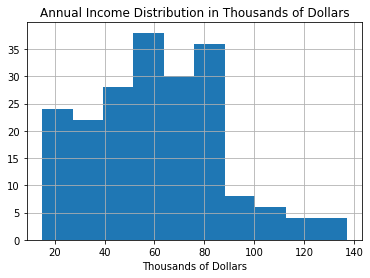

In [9]:
customers.hist('Annual Income (k$)');
plt.title('Annual Income Distribution in Thousands of Dollars');
plt.xlabel('Thousands of Dollars');

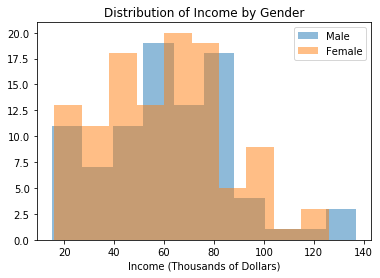

In [10]:
# Histogram of income by gender
plt.hist('Annual Income (k$)', data=customers[customers['Gender'] == 'Male'], alpha=0.5, label='Male');
plt.hist('Annual Income (k$)', data=customers[customers['Gender'] == 'Female'], alpha=0.5, label='Female');
plt.title('Distribution of Income by Gender');
plt.xlabel('Income (Thousands of Dollars)');
plt.legend();

In [11]:
# Create data sets by gender to save time in the future since gender seems to significantly impact other variables
male_customers = customers[customers['Gender'] == 'Male']
female_customers = customers[customers['Gender'] == 'Female']

# Print the average spending score for men and women
print(male_customers['Spending Score (1-100)'].mean())
print(female_customers['Spending Score (1-100)'].mean())

48.51136363636363
51.526785714285715


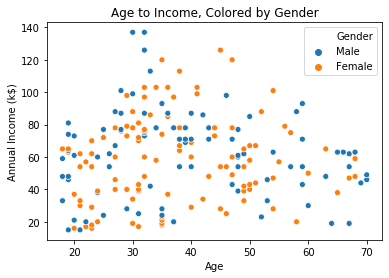

In [12]:

sns.scatterplot('Age', 'Annual Income (k$)', hue='Gender', data=customers);
plt.title('Age to Income, Colored by Gender');

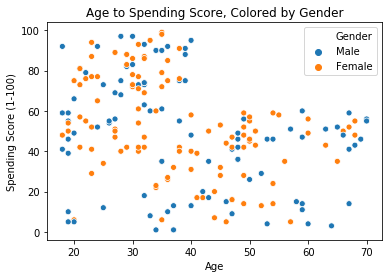

In [14]:
sns.scatterplot('Age', 'Spending Score (1-100)', hue='Gender', data=customers);
plt.title('Age to Spending Score, Colored by Gender');

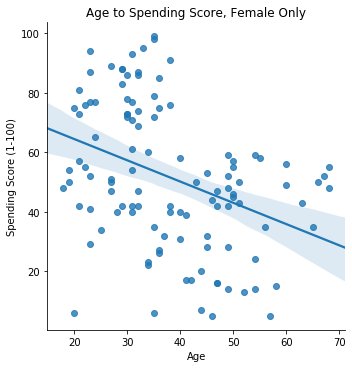

In [15]:
sns.lmplot('Age', 'Spending Score (1-100)', data=female_customers);
plt.title('Age to Spending Score, Female Only');

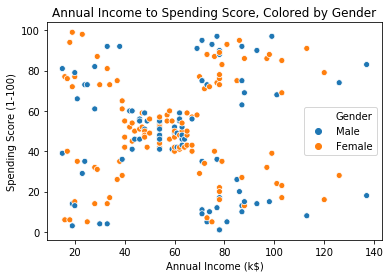

In [16]:
sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)', hue='Gender', data=customers);
plt.title('Annual Income to Spending Score, Colored by Gender');

In [18]:
customers.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [26]:
X= customers.iloc[:, [2,3,4]].values
X

array([[ 19,  15,  39],
       [ 21,  15,  81],
       [ 20,  16,   6],
       [ 23,  16,  77],
       [ 31,  17,  40],
       [ 22,  17,  76],
       [ 35,  18,   6],
       [ 23,  18,  94],
       [ 64,  19,   3],
       [ 30,  19,  72],
       [ 67,  19,  14],
       [ 35,  19,  99],
       [ 58,  20,  15],
       [ 24,  20,  77],
       [ 37,  20,  13],
       [ 22,  20,  79],
       [ 35,  21,  35],
       [ 20,  21,  66],
       [ 52,  23,  29],
       [ 35,  23,  98],
       [ 35,  24,  35],
       [ 25,  24,  73],
       [ 46,  25,   5],
       [ 31,  25,  73],
       [ 54,  28,  14],
       [ 29,  28,  82],
       [ 45,  28,  32],
       [ 35,  28,  61],
       [ 40,  29,  31],
       [ 23,  29,  87],
       [ 60,  30,   4],
       [ 21,  30,  73],
       [ 53,  33,   4],
       [ 18,  33,  92],
       [ 49,  33,  14],
       [ 21,  33,  81],
       [ 42,  34,  17],
       [ 30,  34,  73],
       [ 36,  37,  26],
       [ 20,  37,  75],
       [ 65,  38,  35],
       [ 24,  38

In [32]:
from sklearn.cluster import KMeans
clusters_errors=[]

#we always assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
###Static code to get max no of clusters

for i in range(1,11):
    clusters = KMeans(n_clusters= i, init='k-means++', random_state=0)
    clusters.fit(X)
    clusters_errors.append(clusters.inertia_)

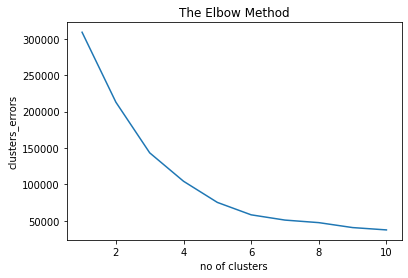

In [33]:
plt.plot(range(1,11), clusters_errors)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('clusters_errors')
plt.show()

In [34]:
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

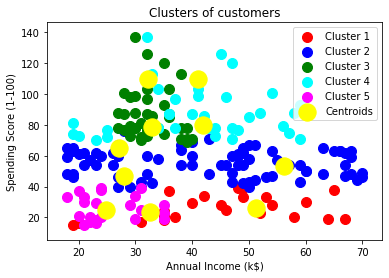

In [35]:
#Visualizing all the clusters 

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [ ]:
###Model Interpretation 
#Cluster 1 (Red Color) -> earning high but spending less
#cluster 2 (Blue Colr) -> average in terms of earning and spending 
#cluster 3 (Green Color) -> earning high and also spending high [TARGET SET]
#cluster 4 (cyan Color) -> earning less but spending more
#Cluster 5 (magenta Color) -> Earning less , spending less


######We can put Cluster 3 into some alerting system where email can be send to them on daily basis as these are easy 
#to convert into customers ######
#wherein others we can set like once in a week or once in a month

# Thank you and please upvote for the motivation